In [1]:
# @title Get model coordinates
import plotly.express as px
import pandas as pd
import numpy as np

coor = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/udra/input_files/distan_lat42.34lon-8.834p3R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [2]:
# @title Get station and sample max gust hour before
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/udra/input_files/udra.csv", usecols = ["time","gust_udr"],parse_dates=["time"]).set_index("time")


#delete duplicated
station = station[~station.index.duplicated(keep='first')]

#resample max hour before

station = station.resample("H",label="right",closed="right").max()
print("Variable statistics")
print(station.describe())

Variable statistics
           gust_udr
count  17472.000000
mean       7.304766
std        4.799445
min        0.000000
25%        3.777781
50%        5.916671
75%        9.583341
max       34.472250


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17305 entries, 2022-01-02 00:00:00 to 2023-12-31 00:00:00
Data columns (total 76 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   gust_o       17305 non-null  float64
 1   dir0         17305 non-null  float64
 2   snow_prec0   17305 non-null  float64
 3   snowlevel0   17305 non-null  float64
 4   mod0         17305 non-null  float64
 5   wind_gust0   17305 non-null  float64
 6   mslp0        17305 non-null  float64
 7   temp0        17305 non-null  float64
 8   rh0          17305 non-null  float64
 9   visibility0  17305 non-null  float64
 10  lhflx0       17305 non-null  float64
 11  lwflx0       17305 non-null  float64
 12  conv_prec0   17305 non-null  float64
 13  prec0        17305 non-null  float64
 14  swflx0       17305 non-null  float64
 15  shflx0       17305 non-null  float64
 16  cape0        17305 non-null  float64
 17  cin0         17305 non-null  float64
 18  cfh0       

None

best correlation observed and meteorological model variables
gust_o        1.000000
wind_gust0    0.827687
wind_gust1    0.826187
wind_gust2    0.824660
mod0          0.797607
mod2          0.795643
mod1          0.795015
cape2         0.342918
cape0         0.340967
cape1         0.337182
Name: gust_o, dtype: float64


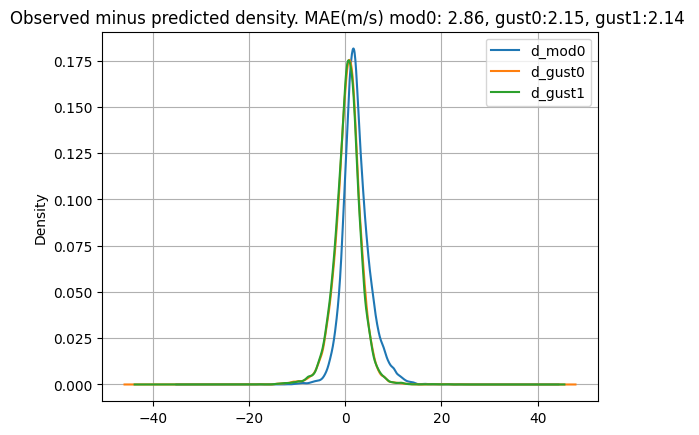

In [3]:
# @title Get meteorologic model d1 .Concatenate with station. MAE (m/s) meteorological model variables and observed variables. Select best point and variable from the meteorological model

from sklearn.metrics import mean_absolute_error

#rename columns
station = station.rename(columns={"gust_udr":"gust_o"})

#load meteorological model
met_model = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/udra/input_files/lat42.34lon-8.834p3R1KmD1.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time").drop_duplicates()

df_all = pd.concat([station,met_model],axis=1).dropna()
display(df_all.info())

# best correlation observed and meteorological model
print("best correlation observed and meteorological model variables")
print(df_all.corr()["gust_o"].sort_values(ascending=False).head(10))

#errors (MAE) in m/s and differences
e_mod0= mean_absolute_error(df_all.gust_o, df_all.mod0)
d_mod0 = df_all.gust_o.values-df_all.mod0.values
e_mod1 = mean_absolute_error(df_all.gust_o, df_all.mod1)
d_mod1 = df_all.gust_o.values-df_all.mod1.values

e_gust0 = mean_absolute_error(df_all.gust_o, df_all.wind_gust0)
d_gust0 = df_all.gust_o.values-df_all.wind_gust0.values
e_gust1 = mean_absolute_error(df_all.gust_o, df_all.wind_gust1)
d_gust1 = df_all.gust_o.values-df_all.wind_gust1.values # lowest value
e_gust2 = mean_absolute_error(df_all.gust_o, df_all.wind_gust2)
d_gust2 = df_all.gust_o.values-df_all.wind_gust2.values

#Select best point and variable from the meteorological model
mae_met = round(e_gust1,2)

pd.DataFrame({"d_mod0":d_mod0,"d_mod0":d_mod0,"d_gust0":d_gust0,"d_gust1":d_gust1,
              }).plot(kind="kde", grid=True,
                      title ="Observed minus predicted density. MAE(m/s) mod0: {:0.2f}, gust0:{:0.2f}, gust1:{:0.2f} ".format(e_mod0,e_gust0,e_gust1));


machine learning number: 0
            y_test       y_pred         diff
count  1731.000000  1731.000000  1731.000000
mean      7.436587     7.472976     0.036389
std       4.805698     4.188933     2.574992
min       0.000000     1.888335   -12.595982
25%       3.888892     4.375420    -1.274168
50%       6.111116     6.185422     0.155417
75%       9.833341     9.320910     1.463265
max      29.361135    25.443770    14.940845
machine learning number: 1
            y_test       y_pred         diff
count  1731.000000  1731.000000  1731.000000
mean      7.429879     7.411860    -0.018019
std       4.942857     4.253200     2.663227
min       0.000000     2.112779   -20.605850
25%       3.833336     4.344448    -1.377015
50%       5.944449     5.994033     0.161528
75%       9.486119     9.034174     1.485348
max      34.472250    25.463215    11.864037
machine learning number: 2
            y_test       y_pred         diff
count  1731.000000  1731.000000  1731.000000
mean      7.431340 

,MAE
count,10.000000
mean,1.941000
std,0.039285
min,1.880000
25%,1.922500
50%,1.945000
75%,1.975000
max,1.990000


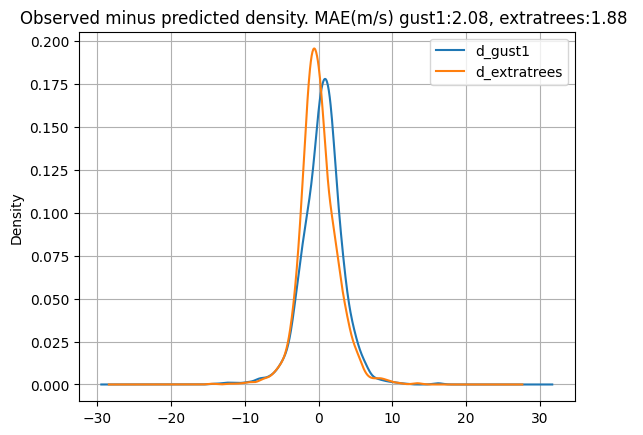

In [4]:
# @title Extratreesregressor


from sklearn.ensemble import ExtraTreesRegressor
from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = ExtraTreesRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_extratrees"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_extratrees = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results[["d_gust1","d_extratrees"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, extratrees:{:0.2f} ".format(e_gust1,e_extratrees));

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 15574, number of used features: 7
[LightGBM] [Info] Start training from score 7.296777
machine learning number: 0
            y_test       y_pred         diff
count  1731.000000  1731.000000  1731.000000
mean      7.436587     7.435360    -0.001227
std       4.805698     4.140406     2.590569
min       0.000000     2.253222   -13.520592
25%       3.888892     4.301809    -1.368377
50%       6.111116     6.068243     0.121023
75%       9.833341     9.216145     1.374891
max      29.361135    24.959741    16.264762
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001120 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of dat

,MAE
count,10.000000
mean,1.895000
std,0.055827
min,1.820000
25%,1.862500
50%,1.880000
75%,1.917500
max,1.990000


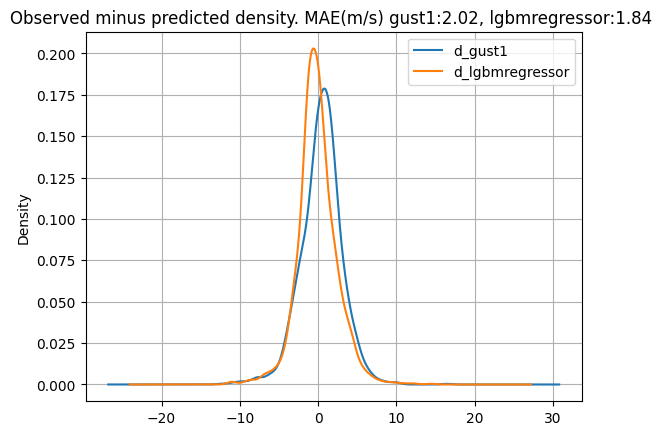

In [5]:
# @title LGBMRegressor

from lightgbm.sklearn import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","prec0"]]

MAE = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE":MAE,});
display(df_r.describe())

#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
d_lgbmregressor = df_results['d_lgbmregressor']
df_results[["d_gust1","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor:{:0.2f} ".format(e_gust1,e_lgbm));

In [6]:
# @title Shapiro test normality MAE samples tested
from scipy.stats import shapiro

sta, p = shapiro(MAE)
print("\np value:",p)
print("significance level alpha=0.01")

alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable MAE in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable MAE no normal distribution in samples")


p value: 0.43076473474502563
significance level alpha=0.01
Accept null hypothesis: normal distribution variable MAE in the samples


In [7]:
# @title T test (1sample) compare machine learning mean absolute error in a sample (n=10) versus meteorological model mean absolute error at point 1 (wind_gust1 =2.02). The alternative hypothesis is: the sample mean absolute error of the sample is less than the given population mean absolute error (popmean). Significance level (alpha) = 0.01

from scipy import stats

alpha = 0.01
sta0, p_value0 = stats.ttest_1samp(MAE, popmean=2.02, alternative="less")

print("MAE in test sample:",MAE)
if p_value0 < alpha:
    print("\nwe are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")
    print("\nwe are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1")
else:
    print("\nwe are accepting null hypothesis:  H0:  Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1")

MAE in test sample: [1.86, 1.98, 1.87, 1.92, 1.82, 1.91, 1.99, 1.88, 1.88, 1.84]

we are rejecting null hypothesis  H0: Mean Absolute Error machine learning = Mean Absolute Error meteorological model wind_gust1

we are accepting alternative hypothesis: Mean Absolute Error machine learning is less than Mean Absolute Error meteorological model wind_gust1


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001617 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1867
[LightGBM] [Info] Number of data points in the train set: 15574, number of used features: 10
[LightGBM] [Info] Start training from score 7.296777
machine learning number: 0
            y_test       y_pred         diff
count  1731.000000  1731.000000  1731.000000
mean      7.436587     7.427791    -0.008797
std       4.805698     4.259366     2.269679
min       0.000000     2.195470   -14.116562
25%       3.888892     4.305905    -1.196555
50%       6.111116     6.007454     0.132639
75%       9.833341     9.322202     1.249934
max      29.361135    25.870470    14.776177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000620 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


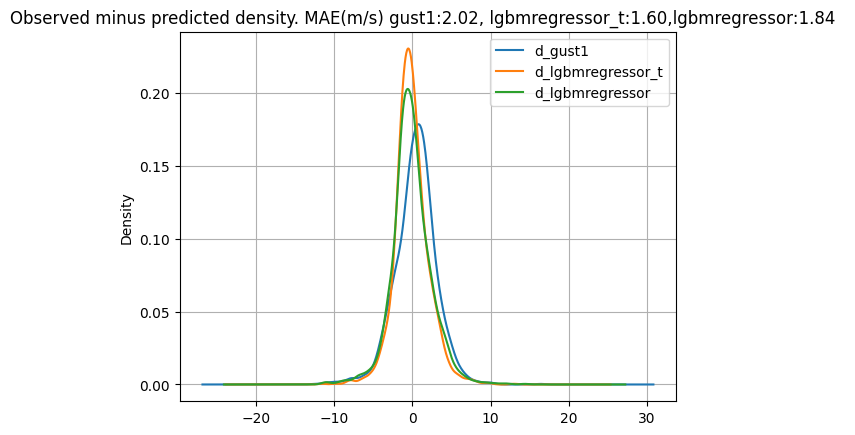

In [8]:
# @title Add time variables

df_all["hour"] = df_all.index.hour
df_all["month"] = df_all.index.month
df_all["dayofyear"] = df_all.index.dayofyear
df_all["weekofyear"] = df_all.index.isocalendar().week.astype(int)

#numpy randomseed
np.random.seed(1)

# target variable
Y = df_all.gust_o
X = df_all[["wind_gust0","mod0","wind_gust1","mod1","wind_gust2","mod2","hour",
            "month","dayofyear","weekofyear"]]

MAE_t = []
for t in range (0,10):
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.1, )
  ml_model = LGBMRegressor(n_estimators=200).fit(X_train,y_train)
  y_pred = ml_model.predict(X_test)
  MAE_t.append(round(mean_absolute_error(y_test,y_pred),2))
  print("machine learning number:",t)
  df = pd.DataFrame({"y_test":y_test},index=y_test.index)
  df["y_pred"] = y_pred
  df["diff"] = df["y_pred"]-df["y_test"]
  print(df.describe())

print("Mean absolute value all machine learning models")
df_r=pd.DataFrame({"MAE_t":MAE_t,});
df_r.describe()
#show results last algorithm
df_results = pd.concat([df_all,df],axis=1).dropna()[["mod0","wind_gust1","y_test","y_pred"]]
df_results ["d_lgbmregressor_t"]= df_results["y_test"]-df_results["y_pred"]
df_results ["d_gust1"] = df_results["y_test"]-df_results["wind_gust1"]
e_lgbm_t = mean_absolute_error(y_test,y_pred)
e_gust1 = mean_absolute_error(df_results.y_test.values,df_results.wind_gust1.values)
df_results["d_lgbmregressor"] = d_lgbmregressor
df_results[["d_gust1","d_lgbmregressor_t","d_lgbmregressor"]].plot(kind="kde",grid=True, title = "Observed minus predicted density. MAE(m/s) gust1:{:0.2f}, lgbmregressor_t:{:0.2f},lgbmregressor:{:0.2f}  ".format(e_gust1,e_lgbm_t,e_lgbm));


In [9]:
# @title T test two related samples. This is a test for the null hypothesis that two related samples have identical mean absolute error. Alternative hypothesis the mean absolute error from the sample with time variables is less than the mean absolute error of from the sample with time variables. Significance level (alpha) = 0.01
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(MAE, MAE_t, alternative="greater")

print("\nMAE without time variables:", np.round(MAE,3))
print("\nMAE with time variables:", np.round(MAE_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:
    print("\nwe are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: MAE machine learning without time variables = MAE machine learning with time variables")

#select mae_ml
mae_ml = np.round(MAE_t,3)[-1]


MAE without time variables: [1.86 1.98 1.87 1.92 1.82 1.91 1.99 1.88 1.88 1.84]

MAE with time variables: [1.66 1.75 1.64 1.7  1.61 1.67 1.75 1.66 1.68 1.6 ]

alpha:  0.01

p_value point:  3.302878723259873e-12

we are rejecting null hypothesis  H0: MAE machine learning without time variables = MAE machine learning with time variables

we are accepting alternative hypothesis: the MAE of the sample with time variables inputs is less than MAE of the sample without time variables inputs


In [10]:
# @title Save algorithm
import pickle
from sklearn.pipeline import Pipeline

score ={"MAE_met":mae_met,"MAE_ml":mae_ml}
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe,"score":score}
pickle.dump(al_file, open("/content/drive/MyDrive/Colab Notebooks/Pontevedra_Ria/udra/algorithms/gust_udra_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMRegressor(n_estimators=200))])
